# BCS DD MINI PROJECT  

In [1]:
#IMPORTING ALL THE DEPENDENCIES

import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from keras import layers
from keras.models import Model
from keras.models import load_model
from keras import callbacks
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.optimizers import Adam     #TO SET CUSTOM LEARNING RATE


11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
#IMPORTING DATASET FROM MNIST DATABASE
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [ ]:
y_train.shape

(60000,)

In [ ]:
images = np.zeros((60000,28,28,1))  #AN EMPTY ARRAY INITIALIZED TO ZERO, TO STORE IMAGES AS MATRIX
images.shape
#RESHAPING ARRAY CUZ INPUT TO THE MODEL ACCEPTS ONLY ONE SIZE
for i in range(y_train.shape[0]):
  images[i] = np.reshape(X_train[i], (28, 28, 1))


In [ ]:
images[1].shape

(28, 28, 1)

In [ ]:
y_train.shape

(60000,)

In [ ]:
def plot_sample(X,y,index):
  plt.figure(figsize=(15,2))
  plt.imshow(X[index])
  plt.title(y[index])

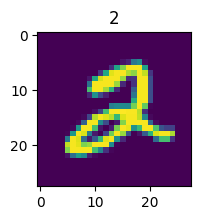

In [ ]:
plot_sample(X_train,y_train,5)

In [ ]:
#BUILDING A BASIC CNN MODEL WITH SEQUENTIAL METHON WHICH IS ALSO PREFFERED FOR MULTI CLASS CLASSIFICATION,
#IT IS BASICALLY COMPRISED OF 3 SETS OF A CONVOLUTION LAYER FOLLOWED BY A MAXPOOLING LAYER AND FINALLY 2 FULLY CONNECTED LAYER WHOSE ACTIVATION FUNCTION ARE RELU AND SOFTMAX RESPECTIVELY
model = models.Sequential([
    layers.Conv2D(filters = 32,kernel_size=(3,3),activation = 'relu',input_shape = (28,28,1)),
    layers.MaxPooling2D((2,2)) ,

    layers.Conv2D(filters = 64, kernel_size=(3,3),activation = 'relu'),
    layers.MaxPooling2D((2,2)) ,

    layers.Conv2D(filters = 64, kernel_size=(3,3),activation = 'relu'),
    layers.MaxPooling2D((2,2)) ,

    layers.Flatten(),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(10, activation = 'softmax')
]
)

optimizer = Adam(learning_rate=0.002)             #ADJUSTING LELARNING RATE IMPROVES ACCURACY AND IT PREVENT SHOOTING OFF OR VERY SLOW DESCENT.
model.compile(optimizer = optimizer , loss = "sparse_categorical_crossentropy",metrics = 'accuracy')

In [ ]:
#BASICALLY WHAT IT DOES IS THAT DURING TRAINING AFTER EACH STEP, THE MODEL CHANGES ITS TRAINABLE PARAMETERS, IN THIS CASE ARE THE FILTERS VALUES IN THE CONVOLUTIONS LAYERS.

In [ ]:

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 1, 1, 64)         

In [ ]:
hist = model.fit(X_train,y_train, batch_size=2000, epochs=20,verbose=1,validation_split=0.2)     #SPILLING DATA INTO 80(TRAINING)-20(VALIDATION) RATIO

Epoch 1/20
24/24 [==============================] - 2s 39ms/step - loss: 4.8655 - accuracy: 0.3359 - val_loss: 1.1445 - val_accuracy: 0.6064
Epoch 2/20
24/24 [==============================] - 1s 29ms/step - loss: 0.7103 - accuracy: 0.7793 - val_loss: 0.3599 - val_accuracy: 0.8928
Epoch 3/20
24/24 [==============================] - 1s 29ms/step - loss: 0.3003 - accuracy: 0.9094 - val_loss: 0.2184 - val_accuracy: 0.9353
Epoch 4/20
24/24 [==============================] - 1s 31ms/step - loss: 0.2029 - accuracy: 0.9383 - val_loss: 0.1720 - val_accuracy: 0.9482
Epoch 5/20
24/24 [==============================] - 1s 30ms/step - loss: 0.1602 - accuracy: 0.9523 - val_loss: 0.1413 - val_accuracy: 0.9576
Epoch 6/20
24/24 [==============================] - 1s 29ms/step - loss: 0.1323 - accuracy: 0.9601 - val_loss: 0.1236 - val_accuracy: 0.9622
Epoch 7/20
24/24 [==============================] - 1s 28ms/step - loss: 0.1107 - accuracy: 0.9668 - val_loss: 0.1142 - val_accuracy: 0.9653
Epoch 8/20
24

In [ ]:
print(y_train.shape)

(60000,)


In [ ]:
model.evaluate(X_test,y_test)



313/313 [==============================] - 2s 4ms/step - loss: 0.0868 - accuracy: 0.9766


[0.08683072775602341, 0.9765999913215637]